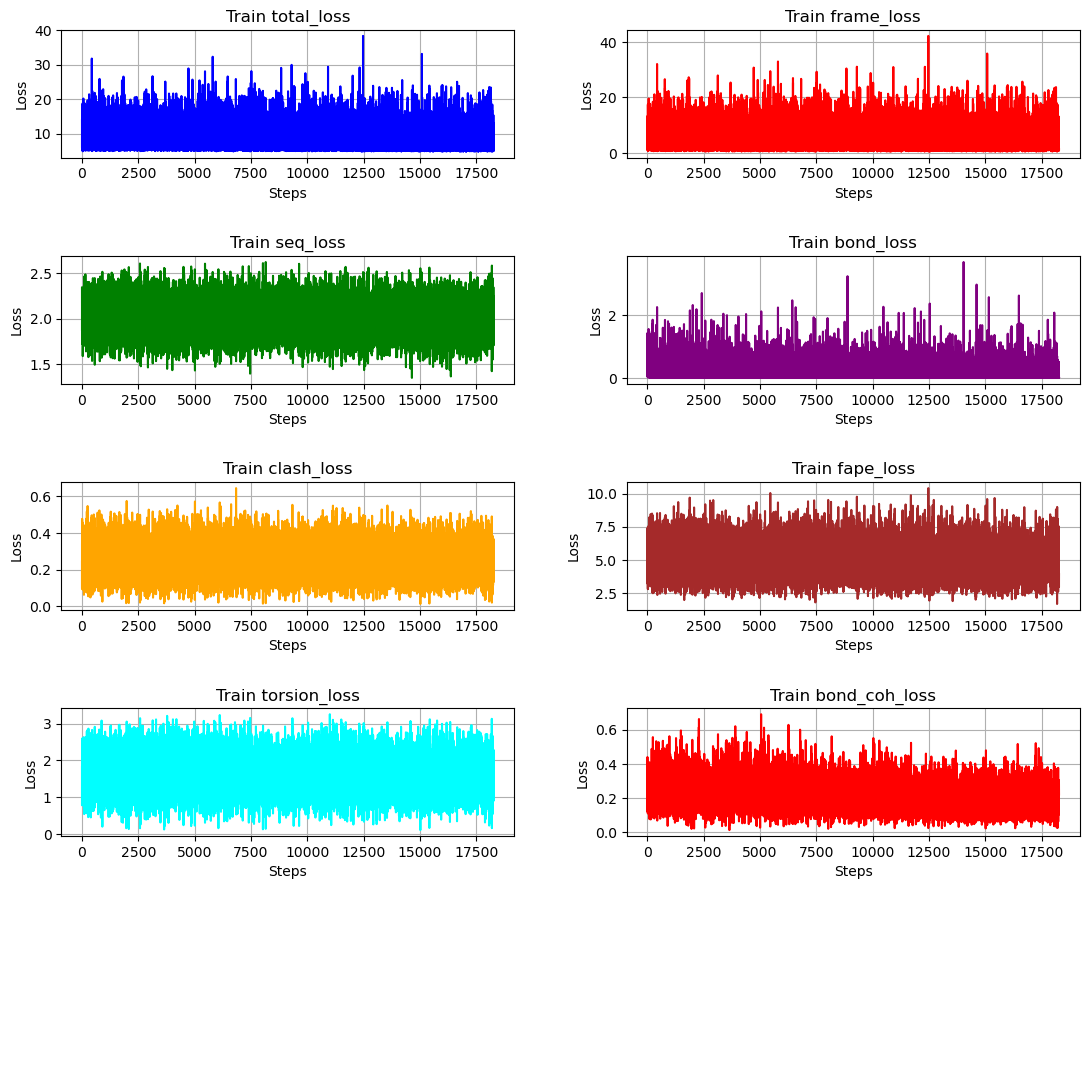

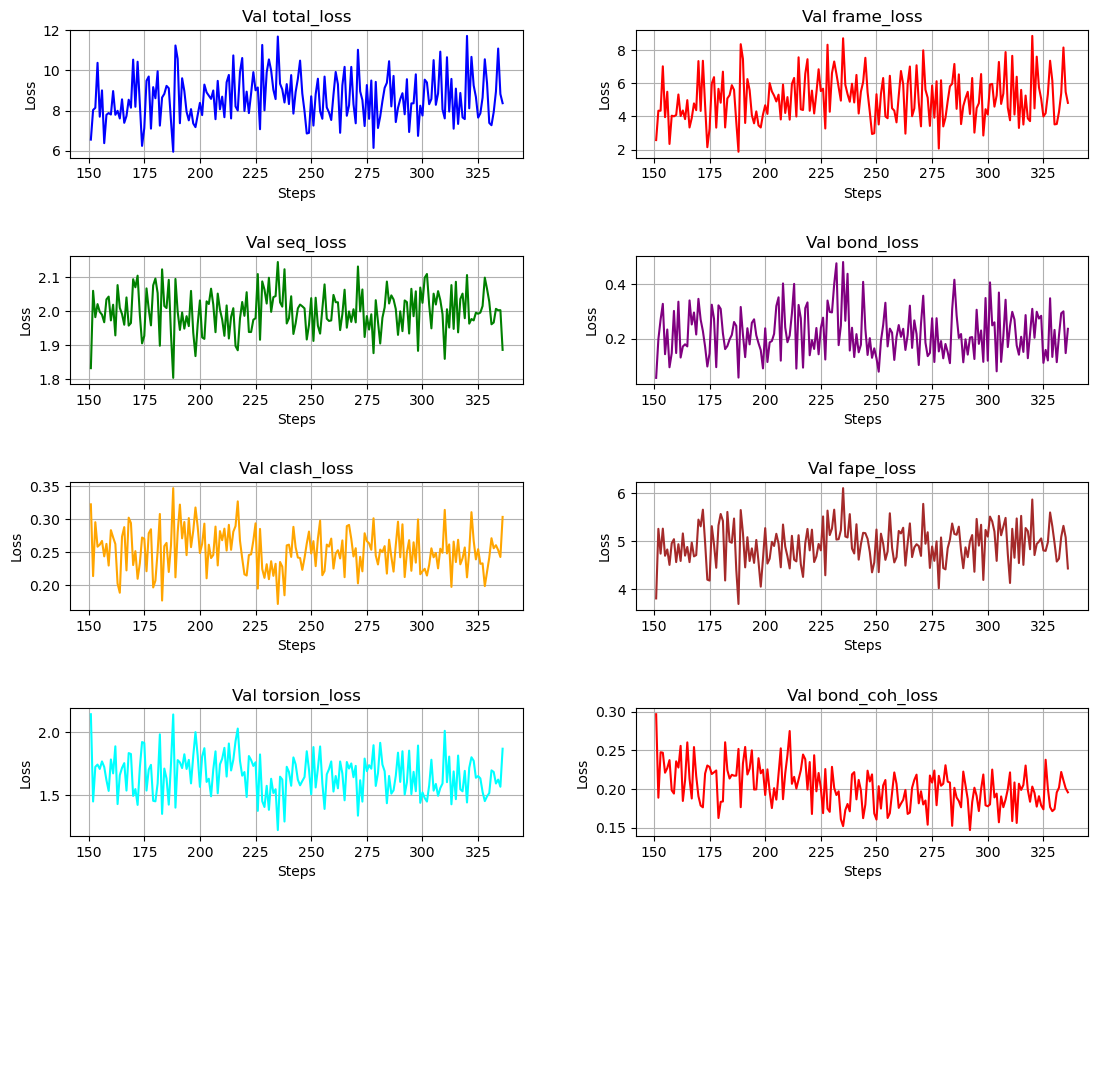

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件
df = pd.read_csv('/home/fit/lulei/WORK/xjt/Protein_design/BondFlow/Train/weight_apm_backbone_monomer43/train_loss.csv')

# --- 新逻辑: 按 type 分离 train / validation，并分别建立 total_steps ---
# 清理列名（若有空白）
df.columns = [c.strip() for c in df.columns]

# 分离
train_df = df[df['type'] == 'train'].reset_index(drop=True).copy()
val_df   = df[df['type'] == 'validation'].reset_index(drop=True).copy()

# 分别建立 total_steps（各自从 1 开始递增）
train_df['total_steps'] = range(1, len(train_df) + 1)
val_df['total_steps']   = range(1, len(val_df) + 1)

# 可选：跳过前若干训练 step（原代码使用 500）
START_OFFSET = 24000
if len(train_df) > START_OFFSET:
    train_df = train_df.iloc[START_OFFSET:].reset_index(drop=True)
START_OFFSET = 150
if len(val_df) > START_OFFSET:
    val_df = val_df.iloc[START_OFFSET:].reset_index(drop=True)
# 需要绘制的损失项（保持与原子图一致，若列存在才绘制）
loss_keys = ['total_loss','frame_loss','seq_loss','bond_loss','clash_loss','fape_loss','torsion_loss',"bond_coh_loss","sc_fape_loss"]
# 新增: 颜色映射
loss_colors = {
    'total_loss': 'blue',
    'frame_loss': 'red',
    'seq_loss': 'green',
    'bond_loss': 'purple',
    'clash_loss': 'orange',
    'fape_loss': 'brown',
    'torsion_loss': 'cyan',
    "bond_coh_loss": "red",
    "sc_fape_loss": "green"
}

def plot_losses(data, title_prefix):
    # 创建一个包含多个子图的图形 (与原来 4x2 保持一致)
    fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 12))
    fig.tight_layout(pad=5.0)
    axes = axes.flatten()
    for i, k in enumerate(loss_keys):
        if k in data.columns:
            axes[i].plot(data['total_steps'], data[k], linewidth=1.5, color=loss_colors.get(k, 'black'))
            axes[i].set_title(f'{title_prefix} {k}')
            axes[i].set_xlabel('Steps')
            axes[i].set_ylabel('Loss')
            axes[i].grid(True)
        else:
            axes[i].set_visible(False)
    # 若最后一个子图原本空置，保持关闭
    if len(loss_keys) < len(axes):
        for j in range(len(loss_keys), len(axes)):
            axes[j].axis('off')
    plt.show()

# 绘制训练集
plot_losses(train_df, 'Train')

# 绘制验证集（如果存在）
if not val_df.empty:
    plot_losses(val_df, 'Val')

In [2]:
! nvidia-smi

No devices were found
